In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import statistics

In [2]:
np.random.seed(42)

### 1. Loading the data set 

In [3]:
df = pd.read_csv('homework5_input_data.csv')

In [4]:
# Separating out the features
X = df.iloc[:, :22].values
# Separating out the classes
Y = df.loc[:,['satisfaction']].values

In [5]:
X.shape, Y.shape

((103594, 22), (103594, 1))

In [6]:
Y

array([['neutral or dissatisfied'],
       ['neutral or dissatisfied'],
       ['satisfied'],
       ...,
       ['neutral or dissatisfied'],
       ['neutral or dissatisfied'],
       ['neutral or dissatisfied']], dtype=object)

In [7]:
X

array([['Male', 'Loyal Customer', 13, ..., 5, 25, 18.0],
       ['Male', 'disloyal Customer', 25, ..., 1, 1, 6.0],
       ['Female', 'Loyal Customer', 26, ..., 5, 0, 0.0],
       ...,
       ['Male', 'disloyal Customer', 30, ..., 4, 7, 14.0],
       ['Female', 'disloyal Customer', 22, ..., 1, 0, 0.0],
       ['Male', 'Loyal Customer', 27, ..., 1, 0, 0.0]], dtype=object)

In [8]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### 2. Converting categorical variables to numeric format

In [10]:
df1 = df[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
df1

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
103589,Female,disloyal Customer,Business travel,Eco
103590,Male,Loyal Customer,Business travel,Business
103591,Male,disloyal Customer,Business travel,Business
103592,Female,disloyal Customer,Business travel,Eco


In [11]:
df2 = df[['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
df2

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103590,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103591,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103592,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [12]:
X1_numeric = pd.get_dummies(df1, columns=df1.columns, prefix=df1.columns)
X1_numeric

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,1,0,0,1,0,0,1
1,0,1,0,1,1,0,1,0,0
2,1,0,1,0,1,0,1,0,0
3,1,0,1,0,1,0,1,0,0
4,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
103589,1,0,0,1,1,0,0,1,0
103590,0,1,1,0,1,0,1,0,0
103591,0,1,0,1,1,0,1,0,0
103592,1,0,0,1,1,0,0,1,0


In [13]:
FX = pd.concat([X1_numeric, df2], axis=1)

In [14]:
FX

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,1,0,0,1,0,0,1,13,...,5,5,4,3,4,4,5,5,25,18.0
1,0,1,0,1,1,0,1,0,0,25,...,1,1,1,5,3,1,4,1,1,6.0
2,1,0,1,0,1,0,1,0,0,26,...,5,5,4,3,4,4,4,5,0,0.0
3,1,0,1,0,1,0,1,0,0,25,...,2,2,2,5,3,1,4,2,11,9.0
4,0,1,1,0,1,0,1,0,0,61,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,1,0,0,1,1,0,0,1,0,23,...,2,2,3,1,4,2,3,2,3,0.0
103590,0,1,1,0,1,0,1,0,0,49,...,5,5,5,5,5,5,5,4,0,0.0
103591,0,1,0,1,1,0,1,0,0,30,...,5,4,3,2,4,5,5,4,7,14.0
103592,1,0,0,1,1,0,0,1,0,22,...,1,1,4,5,1,5,4,1,0,0.0


### 3. Splitting the data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(FX, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((82875, 27), (82875, 1), (20719, 27), (20719, 1))

### 4. DecisionTreeClassifier to predict the class variable & reporting results from 5-fold cross-validation

In [16]:
model = DecisionTreeClassifier(random_state=0)

In [19]:
scores = cross_val_score(model, X_train, Y_train, cv=5)
avg1 = statistics.mean(scores)
print("Individual cross-validation accuracies are " + str(scores))
print("Mean Cross Validation Accuracy is " + str(avg1))

Individual cross-validation accuracies are [0.94322775 0.94220211 0.94413273 0.94582202 0.94328808]
Mean Cross Validation Accuracy is 0.943734539969834


### 5. Training all the data and Computing prediction accuracy on the training and test sets

In [20]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
print('Accuracy of decision tree model on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of decision tree model on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of decision tree model on training set: 1.00
Accuracy of decision tree model on test set: 0.95


### 6. Plotting confusion matrices for test set predictions

Confusion matrix, without normalization
[[11169   551]
 [  558  8441]]
Normalized confusion matrix
[[0.95 0.05]
 [0.06 0.94]]


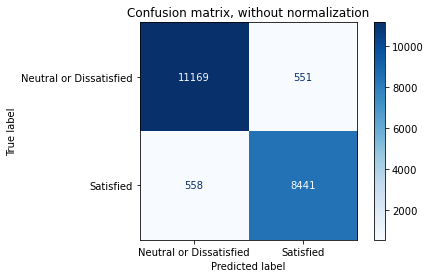

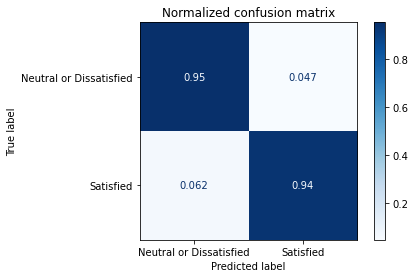

In [22]:
class_names = ['Neutral or Dissatisfied', 'Satisfied']

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()